<h2 align="center">Spacy Language Processing Pipelines Tutorial</h2>

<h3>Blank nlp pipeline</h3>

In [90]:
import spacy

nlp = spacy.blank("en")

doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


We get above error because we have a blank pipeline as shown below. Pipeline is something that starts with a Tokenizer component in a dotted rectange below. You can see there is nothing there hence the blank pipeline

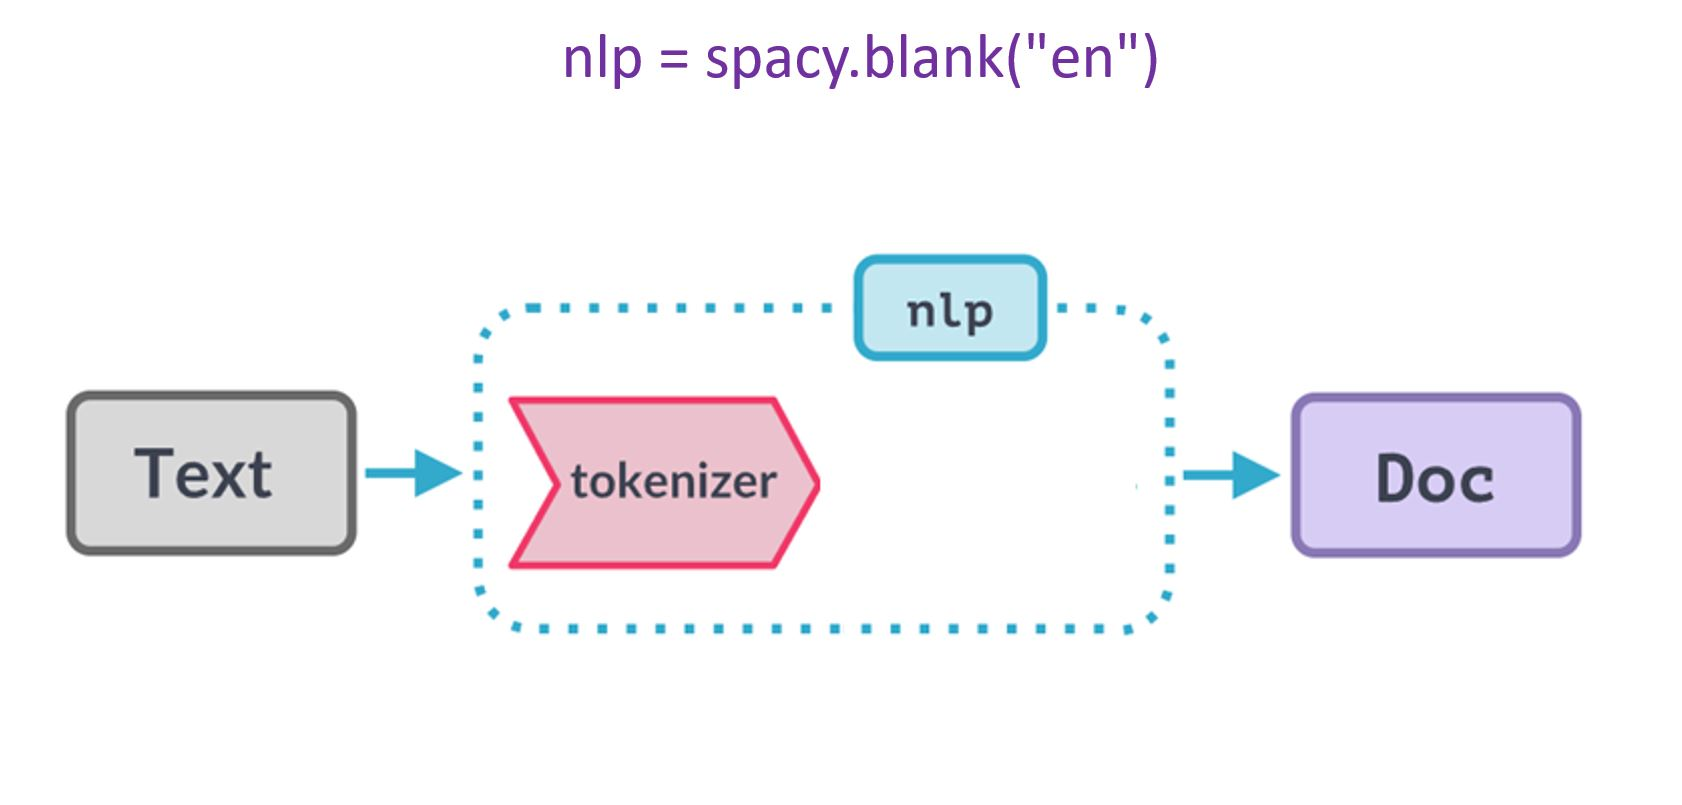

In [68]:
nlp.pipe_names

[]

nlp.pipe_names is empty array indicating no components in the pipeline. Pipeline is something that starts with a tokenizer 

More general diagram for nlp pipeline may look something like below

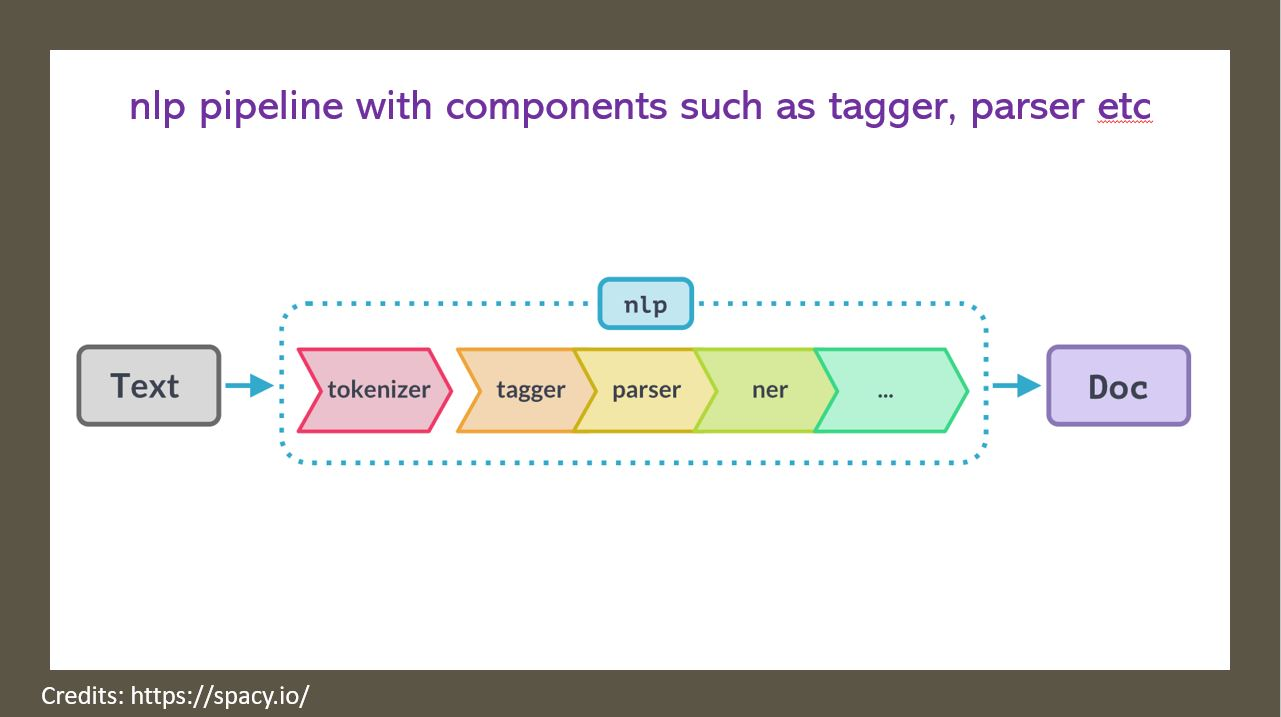

<h3>Download trained pipeline</h3>

To download trained pipeline use a command such as,

python -m spacy download en_core_web_sm

This downloads the small (sm) pipeline for english language

In [85]:
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [86]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1b5ddd5f5e0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1b5ddd5f280>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1b5ddd66a50>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1b5d92391c0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1b5d922ae00>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1b5d996e660>)]

sm in en_core_web_sm means small. There are other models available as well such as medium, large etc. 

In [87]:
doc = nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")

for token in doc:
    print(token, " | ", spacy.explain(token.pos_), " | ", token.lemma_)

Captain  |  proper noun  |  Captain
america  |  proper noun  |  america
ate  |  verb  |  eat
100  |  numeral  |  100
$  |  numeral  |  $
of  |  adposition  |  of
samosa  |  proper noun  |  samosa
.  |  punctuation  |  .
Then  |  adverb  |  then
he  |  pronoun  |  he
said  |  verb  |  say
I  |  pronoun  |  I
can  |  auxiliary  |  can
do  |  verb  |  do
this  |  pronoun  |  this
all  |  determiner  |  all
day  |  noun  |  day
.  |  punctuation  |  .


**Run same code above with a blank pipeline and check what output you see?**

<h3>Named Entity Recognition</h3>

In [34]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


In [43]:
from spacy import displacy

displacy.render(doc, style="ent")

<h3>Trained processing pipeline in French</h3>

In [26]:
nlp = spacy.load("fr_core_news_sm")

OSError: [E050] Can't find model 'fr_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

You need to install the processing pipeline for french language using this command,

python -m spacy download fr_core_news_sm

In [36]:
nlp = spacy.load("fr_core_news_sm")

In [42]:
doc = nlp("Tesla Inc va racheter Twitter pour $45 milliards de dollars")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
Twitter  |  MISC  |  Miscellaneous entities, e.g. events, nationalities, products or works of art


In [39]:
for token in doc:
    print(token, " | ", token.pos_, " | ", token.lemma_)

Tesla  |  X  |  Tesla
Inc  |  X  |  Inc
va  |  VERB  |  aller
racheter  |  VERB  |  racheter
Twitter  |  VERB  |  twitter
pour  |  ADP  |  pour
$  |  NOUN  |  dollar
45  |  NUM  |  45
milliards  |  NOUN  |  milliard
de  |  ADP  |  de
dollars  |  NOUN  |  dollar


<h3>Adding a component to a blank pipeline</h3>

In [82]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']

In [81]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


In below image you can see sentecizer component in the pipeline

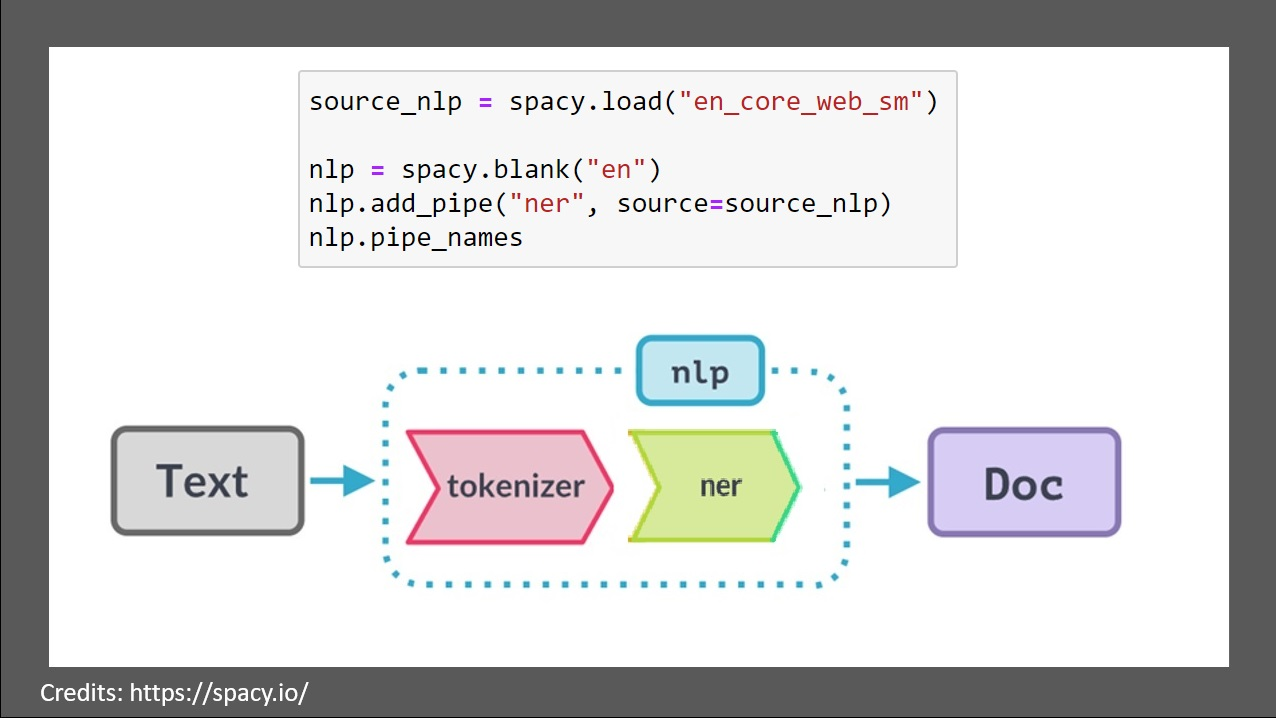